# Collecting The Data

In [3]:
!pip install spotipy

In [4]:
#importing necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import time
import numpy as np
import pandas as pd

In [5]:
from spotipy.oauth2 import SpotifyOAuth

scope = 'user-top-read'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id='ad6f160ef3694347aeb4fb1395f19ad8', client_secret='c28a73c4ac704cc2bfae28d5afb50d08', redirect_uri='http://localhost/'))


In [6]:
def fetch_top_tracks(sp, time_range, limit=50):
    top_tracks_data = sp.current_user_top_tracks(limit=limit, time_range=time_range)
    tracks = []

    for track in top_tracks_data['items']:
        track_details = {
            'id': track['id'],
            'name': track['name'],
            'artist': track['artists'][0]['name'],
            'album': track['album']['name'],
            'release_date': track['album']['release_date'],
            'popularity': track['popularity']
        }
        tracks.append(track_details)

    return tracks


In [7]:
# Fetch top tracks for short_term, medium_term, and long_term
short_term_tracks = fetch_top_tracks(sp, 'short_term')
medium_term_tracks = fetch_top_tracks(sp, 'medium_term')
long_term_tracks = fetch_top_tracks(sp, 'long_term')

# Combine all tracks into one list
all_tracks = short_term_tracks + medium_term_tracks + long_term_tracks


In [8]:
import pandas as pd

# Create DataFrame
df_tracks = pd.DataFrame(all_tracks)

# Drop duplicates if any (as the same track might appear in different time ranges)
df_tracks = df_tracks.drop_duplicates(subset='id')

df_tracks.head()


,id,name,artist,album,release_date,popularity
0,3Onu1MIP8vbmn1vkTrwZ4J,Sen Gelmez Oldun,Sparrow & Barbossa,Réciprocité,2023-06-02,34
1,31g7JATEtYU3uIJBQAc2cW,Shook Pt. 3 - Radio Edit,Nick Morgan,Shook Pt. 3,2023-07-28,53
2,6tE5zuD7eC7cV2O1IyjRLX,Anchor Point,Ahmed Spins,Anchor Point EP,2022-06-03,70
3,57yeWyaoeTt26p0dlEZukQ,Spectrum (Say My Name) - Calvin Harris Remix,Florence + The Machine,Ceremonials,2011,74
4,4T5fdxoMBLOdUBb8CtRuNW,Bayati Shiraz (feat. Kenan Bayramli),Mahmut Orhan,Bayati Shiraz (feat. Kenan Bayramli),2023-10-06,51


In [9]:
def fetch_audio_features(sp, track_ids):
    features_list = []
    for i in range(0, len(track_ids), 50):  # Spotify's limit for audio_features is 50 IDs at a time
        batch = track_ids[i:i + 50]
        audio_features = sp.audio_features(batch)
        features_list.extend(audio_features)
    return features_list

# Fetch audio features for all unique tracks
unique_track_ids = df_tracks['id'].tolist()
audio_features = fetch_audio_features(sp, unique_track_ids)

# Create a DataFrame from audio features
df_features = pd.DataFrame(audio_features)

# Merge the features DataFrame with the tracks DataFrame
df = pd.merge(df_tracks, df_features, on='id')

# Display the combined DataFrame

In [10]:
df.head()

,id,name,artist,album,release_date,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,3Onu1MIP8vbmn1vkTrwZ4J,Sen Gelmez Oldun,Sparrow & Barbossa,Réciprocité,2023-06-02,34,0.762,0.651,1,-9.402,...,0.88700,0.0815,0.0375,123.021,audio_features,spotify:track:3Onu1MIP8vbmn1vkTrwZ4J,https://api.spotify.com/v1/tracks/3Onu1MIP8vbm...,https://api.spotify.com/v1/audio-analysis/3Onu...,177561,4
1,31g7JATEtYU3uIJBQAc2cW,Shook Pt. 3 - Radio Edit,Nick Morgan,Shook Pt. 3,2023-07-28,53,0.741,0.873,10,-5.098,...,0.71100,0.0754,0.7270,126.011,audio_features,spotify:track:31g7JATEtYU3uIJBQAc2cW,https://api.spotify.com/v1/tracks/31g7JATEtYU3...,https://api.spotify.com/v1/audio-analysis/31g7...,281905,4
2,6tE5zuD7eC7cV2O1IyjRLX,Anchor Point,Ahmed Spins,Anchor Point EP,2022-06-03,70,0.679,0.794,2,-9.803,...,0.51000,0.0928,0.3890,123.025,audio_features,spotify:track:6tE5zuD7eC7cV2O1IyjRLX,https://api.spotify.com/v1/tracks/6tE5zuD7eC7c...,https://api.spotify.com/v1/audio-analysis/6tE5...,359024,4
3,57yeWyaoeTt26p0dlEZukQ,Spectrum (Say My Name) - Calvin Harris Remix,Florence + The Machine,Ceremonials,2011,74,0.578,0.946,11,-3.850,...,0.00412,0.0966,0.5880,126.092,audio_features,spotify:track:57yeWyaoeTt26p0dlEZukQ,https://api.spotify.com/v1/tracks/57yeWyaoeTt2...,https://api.spotify.com/v1/audio-analysis/57ye...,218190,4
4,4T5fdxoMBLOdUBb8CtRuNW,Bayati Shiraz (feat. Kenan Bayramli),Mahmut Orhan,Bayati Shiraz (feat. Kenan Bayramli),2023-10-06,51,0.625,0.642,6,-8.045,...,0.21800,0.0856,0.1780,120.986,audio_features,spotify:track:4T5fdxoMBLOdUBb8CtRuNW,https://api.spotify.com/v1/tracks/4T5fdxoMBLOd...,https://api.spotify.com/v1/audio-analysis/4T5f...,214215,4


# Data Preprocessing

In [11]:
df.columns

Index(['id', 'name', 'artist', 'album', 'release_date', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [12]:
df.drop(['type', 'uri', 'track_href', 'analysis_url','time_signature'], axis=1, inplace=True)

In [13]:
df.head()

,id,name,artist,album,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,3Onu1MIP8vbmn1vkTrwZ4J,Sen Gelmez Oldun,Sparrow & Barbossa,Réciprocité,2023-06-02,34,0.762,0.651,1,-9.402,0,0.0558,0.623000,0.88700,0.0815,0.0375,123.021,177561
1,31g7JATEtYU3uIJBQAc2cW,Shook Pt. 3 - Radio Edit,Nick Morgan,Shook Pt. 3,2023-07-28,53,0.741,0.873,10,-5.098,0,0.0317,0.017900,0.71100,0.0754,0.7270,126.011,281905
2,6tE5zuD7eC7cV2O1IyjRLX,Anchor Point,Ahmed Spins,Anchor Point EP,2022-06-03,70,0.679,0.794,2,-9.803,1,0.0353,0.389000,0.51000,0.0928,0.3890,123.025,359024
3,57yeWyaoeTt26p0dlEZukQ,Spectrum (Say My Name) - Calvin Harris Remix,Florence + The Machine,Ceremonials,2011,74,0.578,0.946,11,-3.850,0,0.0482,0.002250,0.00412,0.0966,0.5880,126.092,218190
4,4T5fdxoMBLOdUBb8CtRuNW,Bayati Shiraz (feat. Kenan Bayramli),Mahmut Orhan,Bayati Shiraz (feat. Kenan Bayramli),2023-10-06,51,0.625,0.642,6,-8.045,1,0.0363,0.000968,0.21800,0.0856,0.1780,120.986,214215


In [14]:
df.isnull().sum()

id                  0
name                0
artist              0
album               0
release_date        0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 87
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                88 non-null     object 
 1   name              88 non-null     object 
 2   artist            88 non-null     object 
 3   album             88 non-null     object 
 4   release_date      88 non-null     object 
 5   popularity        88 non-null     int64  
 6   danceability      88 non-null     float64
 7   energy            88 non-null     float64
 8   key               88 non-null     int64  
 9   loudness          88 non-null     float64
 10  mode              88 non-null     int64  
 11  speechiness       88 non-null     float64
 12  acousticness      88 non-null     float64
 13  instrumentalness  88 non-null     float64
 14  liveness          88 non-null     float64
 15  valence           88 non-null     float64
 16  tempo             88 non-null     float64
 17 

In [16]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,54.545455,0.712989,0.714500,5.102273,-8.063614,0.340909,0.063606,0.119369,0.308021,0.184072,0.383075,120.870830,271497.420455
std,17.091982,0.112851,0.151604,3.883474,2.155089,0.476731,0.045769,0.172186,0.322571,0.144590,0.247574,11.033931,96294.503759
min,8.000000,0.374000,0.345000,0.000000,-11.949000,0.000000,0.024000,0.000065,0.000000,0.040000,0.034800,92.193000,90323.000000
25%,45.000000,0.651750,0.616000,1.000000,-9.800750,0.000000,0.037675,0.006393,0.006130,0.089925,0.177000,119.957750,197320.250000
50%,53.000000,0.718000,0.726500,5.000000,-8.056000,0.000000,0.048800,0.038250,0.181500,0.115000,0.376000,122.012500,257039.000000
75%,67.000000,0.778500,0.830750,9.000000,-6.613750,1.000000,0.072425,0.175500,0.614250,0.235000,0.557500,124.013000,329395.750000
max,90.000000,0.988000,0.989000,11.000000,-3.394000,1.000000,0.299000,0.934000,0.961000,0.676000,0.964000,186.151000,504590.000000


In [17]:
# Saving the dataframe as a CSV file due to api limits
file_path = './data/my_top_tracks.csv'
df.to_csv(file_path, index=False)

In [18]:
df['duration_min'] = df['duration_ms'] / 60000

# EDA

## Distribution of numerical features

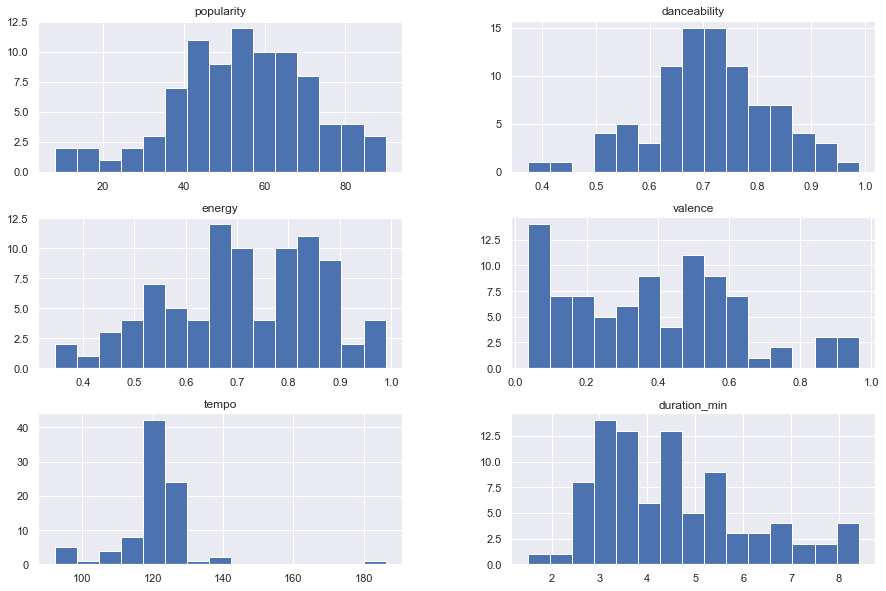

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # Use seaborn's default style

# Histograms or density plots
df[['popularity', 'danceability', 'energy', 'valence', 'tempo', 'duration_min']].hist(bins=15, figsize=(15, 10))
plt.show()


## Exploring Categorical Data

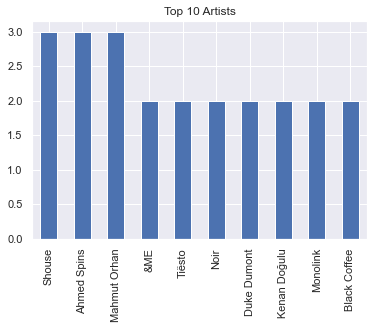

In [20]:
top_artists = df['artist'].value_counts().head(10)
top_artists.plot(kind='bar')
plt.title('Top 10 Artists')
plt.show()

## Feature correlations

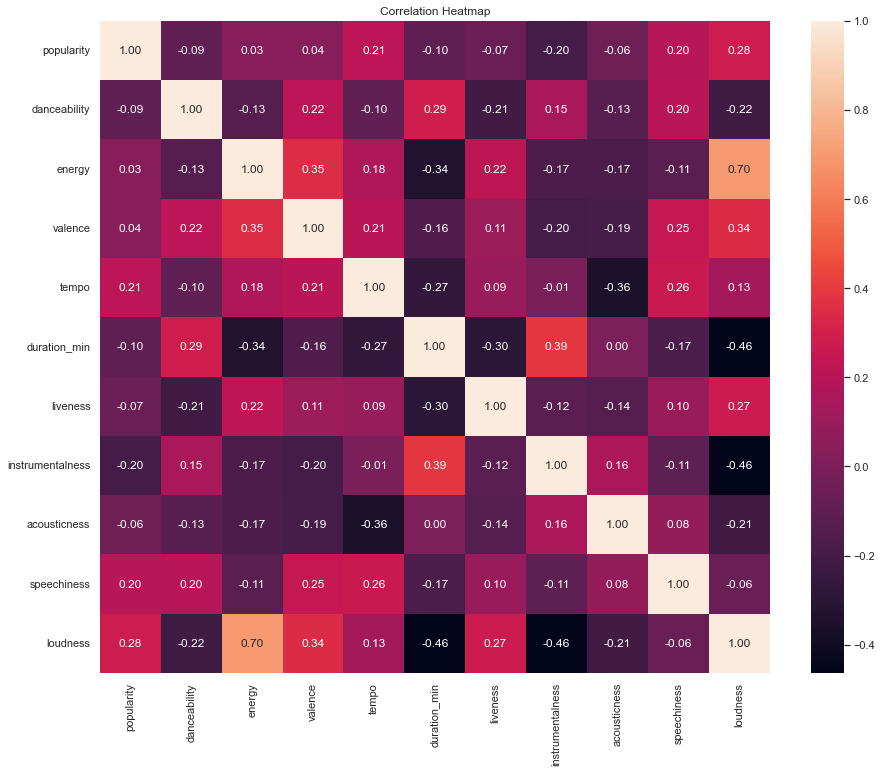

In [21]:
plt.figure(figsize=(15, 12))
plt.title('Correlation Heatmap')
sns.heatmap(df[['popularity', 'danceability', 'energy', 'valence', 'tempo', 'duration_min','liveness','instrumentalness','acousticness','speechiness','loudness']].corr(), annot=True, fmt=".2f")
plt.show()

# Feature Engineering

In [22]:
# Binning 'popularity' into categories
df['popularity_category'] = pd.cut(df['popularity'], bins=[0, 30, 60, 100], labels=['Low', 'Medium', 'High'])

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['loudness_normalized'] = scaler.fit_transform(df[['loudness']])


In [24]:
df['tempo_category'] = pd.cut(df['tempo'], bins=[0, 100, 140, 200], labels=['Slow', 'Moderate', 'Fast'])

In [25]:
df['danceability_energy'] = df['danceability'] * df['energy']

In [26]:
key_dict = {0: 'C', 1: 'C♯/D♭', 2: 'D', 3: 'D♯/E♭', 4: 'E', 5: 'F', 6: 'F♯/G♭', 7: 'G', 8: 'G♯/A♭', 9: 'A', 10: 'A♯/B♭', 11: 'B'}
mode_dict = {0: 'Minor', 1: 'Major'}

df['key_label'] = df['key'].map(key_dict)
df['mode_label'] = df['mode'].map(mode_dict)


In [27]:
def classify_mood(row):
    if row['energy'] < 0.4 and row['tempo'] < 100:
        return 'Calm'
    elif row['energy'] > 0.6 and row['tempo'] > 120:
        return 'Energetic'
    elif row['valence'] > 0.5:
        return 'Happy'
    else:
        return 'Sad'

# Apply the function to your DataFrame
df['mood'] = df.apply(classify_mood, axis=1)

In [28]:
df.columns

Index(['id', 'name', 'artist', 'album', 'release_date', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'duration_min', 'popularity_category',
       'loudness_normalized', 'tempo_category', 'danceability_energy',
       'key_label', 'mode_label', 'mood'],
      dtype='object')

# Visualization and Analysis

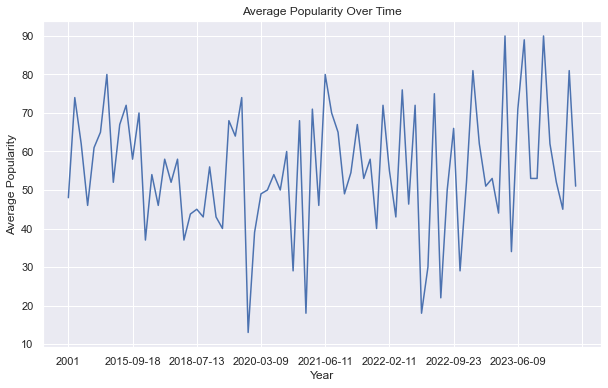

In [29]:
# Popularity over time
plt.figure(figsize=(10, 6))
df.groupby('release_date')['popularity'].mean().plot(kind='line')
plt.title('Average Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()


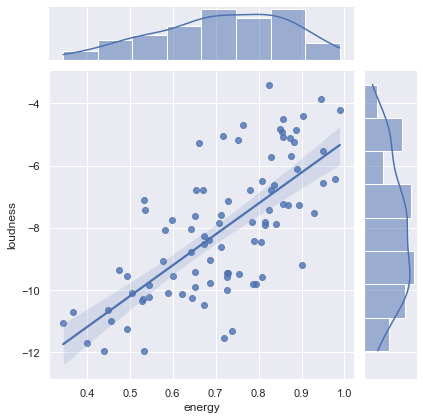

In [30]:
sns.jointplot(x='energy', y='loudness', data=df, kind='reg')
plt.show()

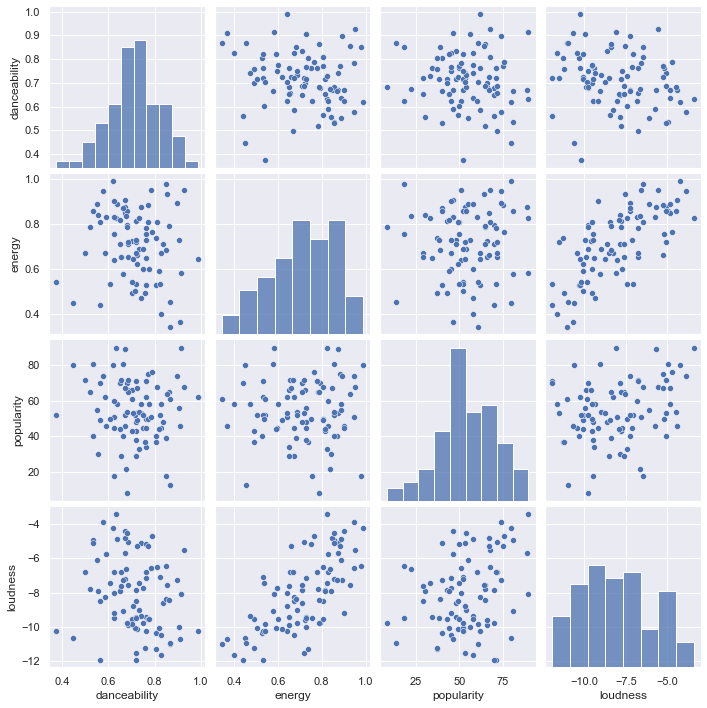

In [31]:
sns.pairplot(df[['danceability', 'energy', 'popularity','loudness']])
plt.show()


/Users/yagizbarut/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9837 (\N{MUSIC FLAT SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


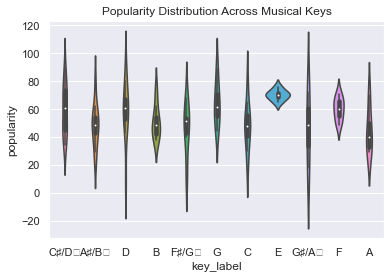

In [32]:
sns.violinplot(x='key_label', y='popularity', data=df)
plt.title('Popularity Distribution Across Musical Keys')
plt.show()


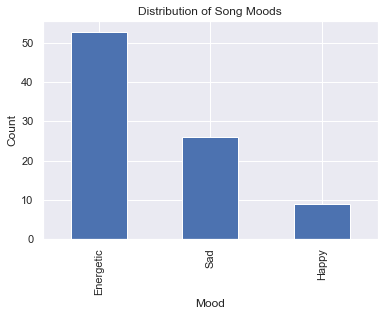

In [33]:
mood_counts = df['mood'].value_counts()

# Plotting
mood_counts.plot(kind='bar')
plt.title('Distribution of Song Moods')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.show()

# Machine Learning

In [34]:
ml_df = df.drop(['id','name','artist','album','release_date','duration_ms'],axis=1)

## Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['popularity_category', 'tempo_category', 'key_label', 'mode_label', 'mood']

for col in categorical_columns:
    le = LabelEncoder()
    ml_df[col] = le.fit_transform(ml_df[col])
    label_encoders[col] = le  # Store each encoder if needed later


## Model Building and Training

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'mood' is the target variable
X = ml_df.drop('mood', axis=1).values
Y = LabelEncoder().fit_transform(ml_df['mood'].values)

# Normalize features
X = StandardScaler().fit_transform(X)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [37]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [38]:
import torch.nn as nn
import torch.nn.functional as F

class MoodClassifier(nn.Module):
    def __init__(self):
        super(MoodClassifier, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, len(np.unique(Y)))

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MoodClassifier()


In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/25], Loss: 1.1843
Epoch [2/25], Loss: 1.0914
Epoch [3/25], Loss: 1.0472
Epoch [4/25], Loss: 0.9995
Epoch [5/25], Loss: 0.9742
Epoch [6/25], Loss: 0.9460
Epoch [7/25], Loss: 0.9337
Epoch [8/25], Loss: 1.0380
Epoch [9/25], Loss: 0.7771
Epoch [10/25], Loss: 0.9174
Epoch [11/25], Loss: 0.6260
Epoch [12/25], Loss: 0.5356
Epoch [13/25], Loss: 0.8612
Epoch [14/25], Loss: 0.8408
Epoch [15/25], Loss: 0.7209
Epoch [16/25], Loss: 0.5339
Epoch [17/25], Loss: 0.7883
Epoch [18/25], Loss: 0.8079
Epoch [19/25], Loss: 1.1305
Epoch [20/25], Loss: 0.5885
Epoch [21/25], Loss: 0.7299
Epoch [22/25], Loss: 0.4957
Epoch [23/25], Loss: 0.1632
Epoch [24/25], Loss: 0.7047
Epoch [25/25], Loss: 0.3894


In [40]:
# Test the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model: {100 * correct / total}%')


Accuracy of the model: 66.66666666666667%
